In [8]:
import random
from Functions import *
from AIS import AIS_MALBP
import pandas as pd

In [ ]:
problem = 'BOWMAN8.txt'
popsize = 5
Descendants = 5
cloned = 5
mutation_rate = 0.3
mutation_func = '1'
alpha = 0.90
result = AIS_MALBP(problem, 31, alpha, popsize, Descendants, cloned, mutation_rate, mutation_func)
solution = result[0]
pd.DataFrame(solution).transpose().to_csv('sol.csv')
result[2], result[3]

In [9]:
with open ('problems.csv' , 'r') as fl:
    problems = fl.readlines()
output = pd.DataFrame()
probs = []
alpha = 0.95
results = []
stations = []
operators = []
time = []
lower_bounds = []
cycle_times = []
for i in problems:
    line = i.strip().split(',')
    problem = line[0]
    ct = int(line[1])
    result = AIS_MALBP(problem, ct, alpha, popsize, Descendants, cloned, mutation_rate, mutation_func)
    probs.append(problem)
    results.append(result[1])
    stations.append(result[2])
    operators.append(result[3])
    time.append(result[4])
    cycle_times.append(ct)
    lower_bounds.append(result[5])    
output['Problem'],output['cycle time'], output['result'] = probs, cycle_times, results
output['num_stations'], output['num_operators'], output['time'] = stations, operators, time
output['Lower bound'] = lower_bounds





NameError: name 'popsize' is not defined

In [ ]:
output.to_csv('computational_resluts.csv', index = False)

In [1]:
with open("Taguchi_problems.csv", "r") as fl:
	Taguchi_problems = fl.readlines()[1:]
with open('OA.csv', 'r') as fl1:
    orthogonal_array = fl1.readlines()
import pandas as pd
import time as tm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [10]:
results = pd.DataFrame()
for k in Taguchi_problems: 
    x = k.strip().split(',')
    ct = int(x[1])
    print(x[0], ct)	
    prob = prob_data(x[0])
    problem_data = prob[0]
    tasks = [x for x in problem_data]
    ts_len = len(tasks)
    total_area = prob[1]
    outputs = []
    for i in orthogonal_array:
        trail = i.strip().split(',')
        popsize = int(trail[0])
        Descendants = int(trail[1])
        cloned = int(trail[2])
        mutation_rate = float(trail[3])
        mutation_function = mutate_fn(trail[4])
        best_solution_eval = float('inf')
        population = {}        
        # Generate perants
        start = tm.time()
        for j in range(popsize):
            sol_structure = random.sample(tasks,ts_len)									
            sol = SolutionClass(ct, total_area, 0, problem_data, sol_structure,2)
            population[j] = sol
            if population[j].solution[1] < best_solution_eval:
                bestsol = population[j].solution[0]                
                best_solution_eval = population[j].solution[1]
                best_struct = population[j].sol_structure
        # Generate Descendants
        for j in range(popsize):
            mutation_function(population[j], mutation_rate, Descendants)
            for k in population[j].mutated_solutions:
                if k[1] < best_solution_eval:
                    best_solution_eval = k[1]
                    bestsol = k[0]
                    best_struct = list(k[0].keys())
        # Clonal selection
        sol = SolutionClass(ct, total_area, 0, problem_data, best_struct,2)
        mutation_function(sol, mutation_rate, cloned)
        if sol.solution[1] < best_solution_eval:
            bestsol = sol.solution[0]                
            best_solution_eval = sol.solution[1]
            best_struct = sol.sol_structure
        end = tm.time() - start
        outputs.append(best_solution_eval - 1/end)
        # print(outputs)
    results[x[0][:-4]] = outputs

MANSOOR.txt 48
JACKSON.txt 7
MITCHELL.txt 14
HESKIA.txt 138
GUNTHER.txt 41
KILBRID.txt 56
HAHN.txt 2004
ARC83.txt 3786
ARC111.txt 5755


True

In [24]:
results / results.sum()

,MANSOOR,JACKSON,MITCHELL,HESKIA,GUNTHER,KILBRID,HAHN,ARC83,ARC111
0,0.021725,0.031478,-0.009112,-0.280478,0.077512,0.071315,0.060753,0.054967,0.055305
1,0.025049,0.028280,-0.004490,-0.347305,0.078060,0.071030,0.070615,0.054902,0.055297
2,0.021150,0.022308,-0.022357,-0.354832,0.082226,0.074119,0.074855,0.055174,0.055384
3,0.025048,0.016712,-0.016246,-0.367633,0.081455,0.073820,0.063113,0.057869,0.055415
4,0.052808,0.029293,0.030726,-0.042000,0.063661,0.059847,0.067015,0.056789,0.053142
5,0.036531,0.023838,0.008051,-0.293072,0.072070,0.066785,0.067977,0.057071,0.055169
6,0.062876,0.062056,0.100464,0.306965,0.040116,0.045148,0.048008,0.052553,0.056465
7,0.045382,0.065377,0.049745,0.159597,0.053919,0.054154,0.058062,0.055861,0.054790
8,0.083494,0.093513,0.145444,0.530104,0.027829,0.038283,0.044598,0.054512,0.056395
9,0.052814,0.058992,0.049747,-0.024036,0.058630,0.056785,0.061586,0.056188,0.054972


In [2]:
DOE_Data = pd.read_csv('DOE_Data.csv')
# trails = list(map(lambda x:x.strip(),orthogonal_array))
# levels = pd.DataFrame(list(map(lambda x:x.split(','),trails)))
# levels.columns = ['P', 'D', 'C', 'MR', 'MF']


In [3]:
# The results table is that one gotten from implementing the trails
# The orthogonal arra comes from the orthogonal array csv file
# factor names are to be inserted as a list
def DOE_Data_fn(results, orthogonal_array, factors_names):
    trails = list(map(lambda x:x.strip(),orthogonal_array))
    normalized_results = results / results.sum()
    # normalized_results.columns = [x[:-4] for x in list(normalized_results.columns) if '.' in x]
    levels = pd.DataFrame(list(map(lambda x:x.split(','),trails)))
    levels.columns = factors_names
    # Using pd.concat method to connect two dataframes in pandas
    DOE_Data = pd.concat([levels, normalized_results], axis=1)
    DOE_Data.to_csv('DOE_Data.csv', index = False)
    return DOE_Data, levels


In [4]:
def stacked_data(factor_name, DOE_Data, levels):
    factor_levels = list(dict.fromkeys(DOE_Data[factor_name]))
    # DOE_Data[DOE_Data[factor_name] == factor_levels[0]].iloc[:,len(levels.columns):]
    stacked = pd.DataFrame()
    level_values = []
    for i in factor_levels:    
        levels_values =DOE_Data[DOE_Data[factor_name] == i].iloc[:,len(levels.columns):]
        for j in range(len(levels_values)):
            level_values.extend(list(levels_values.iloc[:,j]))
    stacked = pd.DataFrame()
    stacked_levels = []
    stacked_values = []
    for i in factor_levels:
        values = DOE_Data[DOE_Data[factor_name]==i].iloc[:, len(levels.columns):]
        text = len(values.columns) * len(values) * (str(i) + ',')
        stacked_levels.extend(text[:-1].split(','))
        for i in range(len(values)):
            for j in range(len(values.columns)):
                value = [values.iloc[i,j]]
                stacked_values.extend(value)
    stacked['levels'] = stacked_levels
    stacked['Values'] = stacked_values
    return stacked

F_onewayResult(statistic=5.559958739939089, pvalue=0.004634852256684295)


C:\Python39\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
10,15,-0.0193,0.8248,-0.1012,0.0625,False
10,5,0.0888,0.0299,0.007,0.1707,True
15,5,0.1082,0.0059,0.0263,0.19,True


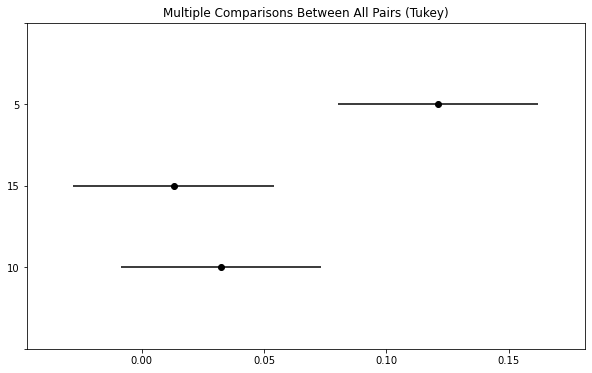

In [18]:
output = DOE_Data_fn(results, orthogonal_array, ['P', 'D', 'C', 'MR', 'MF'])
DOE_Data = output[0]
levels = output[1]
factor_name = 'P'
stacked = stacked_data(factor_name, DOE_Data, levels)
# print(f_oneway(levels_v[0], levels_v[1], levels_v[2], levels_v[3]))
factor_lvl = list(dict.fromkeys(levels[factor_name]))
# factor_lvl = [int(x) for x in factor_lvl]
levels_1 = list(stacked[stacked['levels'] == factor_lvl[0]]['Values'])
levels_2 = list(stacked[stacked['levels'] == factor_lvl[1]]['Values'])
levels_3 = list(stacked[stacked['levels'] == factor_lvl[2]]['Values'])
print(f_oneway(levels_1, levels_2, levels_3))

tukey = pairwise_tukeyhsd(endog= stacked['Values'], groups=stacked['levels'], alpha=0.05)
# print(tukey)
tukey.plot_simultaneous()

tukey.summary()


In [ ]:
DOE_Data.to_csv('DOE_data.csv', index=False)

In [ ]:
trails = list(map(lambda x:x.strip(),orthogonal_array))
levels = pd.DataFrame(list(map(lambda x:x.split(','),trails)))
levels.columns = ['P', 'D', 'C', 'MR', 'MF']

In [ ]:
import pandas as pd
DOE_Data = pd.read_csv('DOE_data.csv')

In [ ]:
factor_name = 'P'
stacked = stacked_data(factor_name, DOE_Data, levels)
# print(f_oneway(levels_v[0], levels_v[1], levels_v[2], levels_v[3]))
factor_lvl = list(dict.fromkeys(levels[factor_name]))
# factor_lvl = [int(x) for x in factor_lvl]
levels_1 = list(stacked[stacked['levels'] == factor_lvl[0]]['Values'])
levels_2 = list(stacked[stacked['levels'] == factor_lvl[1]]['Values'])
levels_3 = list(stacked[stacked['levels'] == factor_lvl[2]]['Values'])
print(f_oneway(levels_1, levels_2, levels_3))

tukey = pairwise_tukeyhsd(endog= stacked['Values'], groups=stacked['levels'], alpha=0.05)
# print(tukey)
tukey.plot_simultaneous()

tukey.summary()